In [1]:
# Stdlib
import pickle
from IPython.display import display, Latex
from ast import literal_eval as literal

# Scientific computing
import numpy as np

# Data handling and vis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
from tabulate import tabulate

# Preprocessing

## Loading and concatenating dataframes

In [2]:
# Small datasets
metadata = {
    "PROJECT_ID": "EMB_ex29",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v3.1",
    "DATE": "20230403"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")
# df_small = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

# # Large datasets
# metadata = {
#     "PROJECT_ID": "EMB_ex29",
#     "RESEARCHERS": "DK",
#     "CURRENT_VERSION": "v1.1",
#     "DATE": "20230322"
# }
# TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

# df_large = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

# df = pd.concat([df_small, df_large])
# df = df.reset_index()

In [3]:
df

,Unnamed: 0,system,l1,l2,features,theta,intercept,coefficients,accuracy,auroc,aupr,log_penalty
0,0,celegans,1,2,{'imb'},0.05,-0.884204,[0.],0.653846,0.500000,0.673077,-9.0
1,1,celegans,1,2,{'imb'},0.05,-0.713766,[0.],0.655856,0.500000,0.672072,-9.0
2,2,celegans,1,2,{'imb'},0.05,-0.610909,[0.],0.657219,0.500000,0.671391,-9.0
3,3,celegans,1,2,{'imb'},0.05,-0.464306,[0.],0.658970,0.500000,0.670515,-9.0
4,4,celegans,1,2,{'imb'},0.05,-0.245122,[0.],0.660245,0.500000,0.669877,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3075,3075,london,1,2,"{'imb', 'emb', 'deg'}",0.95,-0.778390,[0.17022141 3.3116352 ],0.962963,0.963636,0.991312,-9.0
3076,3076,london,1,2,"{'imb', 'emb', 'deg'}",0.95,NaN,NaN,NaN,NaN,NaN,-9.0
3077,3077,london,1,2,"{'imb', 'emb', 'deg'}",0.95,-0.676008,[0.14906823 3.32429048],1.000000,1.000000,1.000000,-9.0
3078,3078,london,1,2,"{'imb', 'emb', 'deg'}",0.95,-0.857248,[0.13356526 3.30436041],1.000000,1.000000,1.000000,-9.0


## Pruning

In [4]:
# Drop dummy index
df = df.drop(columns=["Unnamed: 0"])

# Drop rows with missing data
df.dropna(how="any", inplace=True)

## Reindexing and renaming

In [5]:
# Rename layers
df = df.rename(columns={"l1": "alpha", "l2": "beta"})

In [6]:
df.describe()

,alpha,beta,theta,intercept,accuracy,auroc,aupr,log_penalty
count,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.0
mean,1.250569,3.002278,0.498975,0.484603,0.812588,0.750847,0.821252,-9.0
std,0.433412,1.733646,0.284163,1.479066,0.147403,0.208807,0.224900,0.0
min,1.000000,2.000000,0.050000,-2.594764,0.184874,0.237558,0.168886,-9.0
25%,1.000000,2.000000,0.230000,0.000000,0.694575,0.524224,0.638415,-9.0
50%,1.000000,2.000000,0.500000,0.000000,0.845528,0.807861,0.964204,-9.0
75%,2.000000,6.000000,0.770000,0.800595,0.935843,0.956286,0.991348,-9.0
max,2.000000,6.000000,0.950000,8.684391,1.000000,1.000000,1.000000,-9.0


# Analysis

## Performance

### One feature

<Figure size 640x480 with 0 Axes>

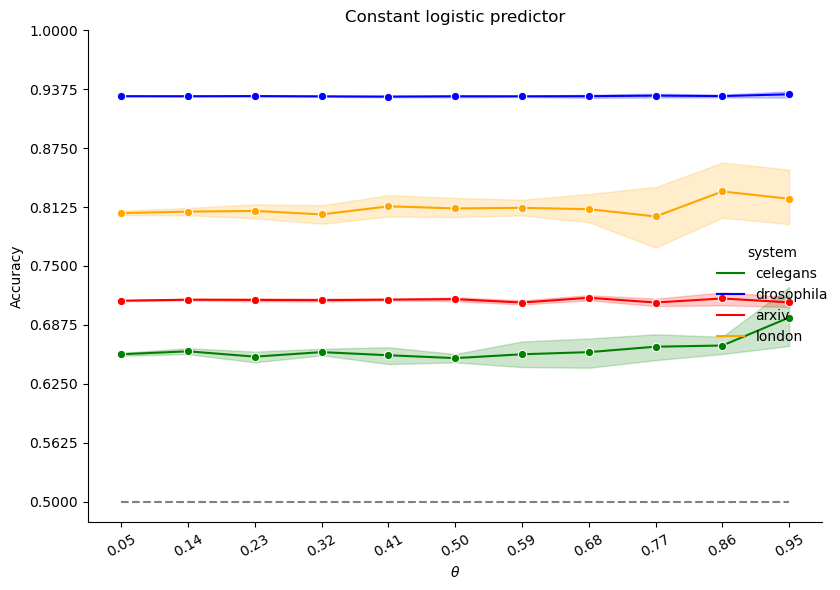

In [7]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'imb'}"], kind="line",
    x="theta", y="accuracy",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("Accuracy")


# Figure-level attributes
plt.title("Constant logistic predictor")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_imb_{TAG}.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

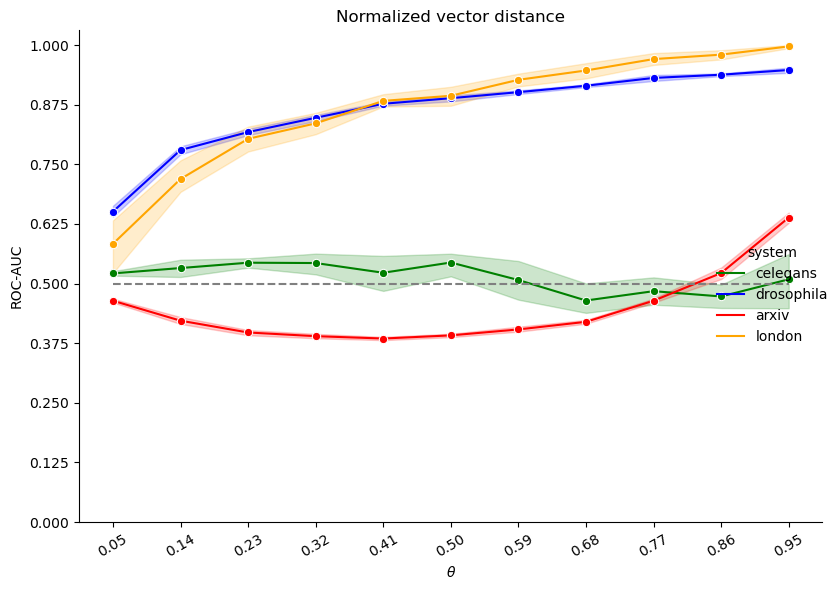

In [8]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'emb'}"], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Normalized vector distance")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_emb_{TAG}.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

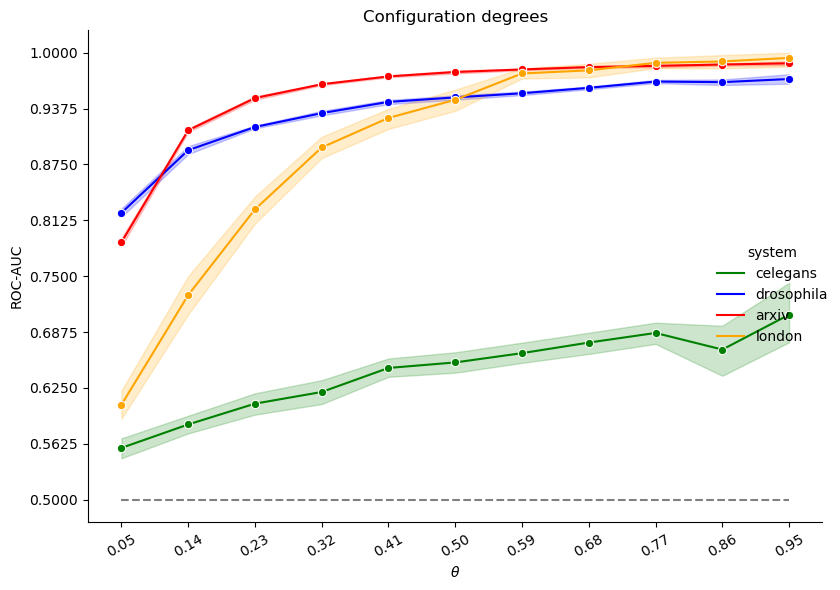

In [9]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'deg'}"], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration degrees")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_deg_{TAG}.png", facecolor="white", transparent=False)

### Two features

<Figure size 640x480 with 0 Axes>

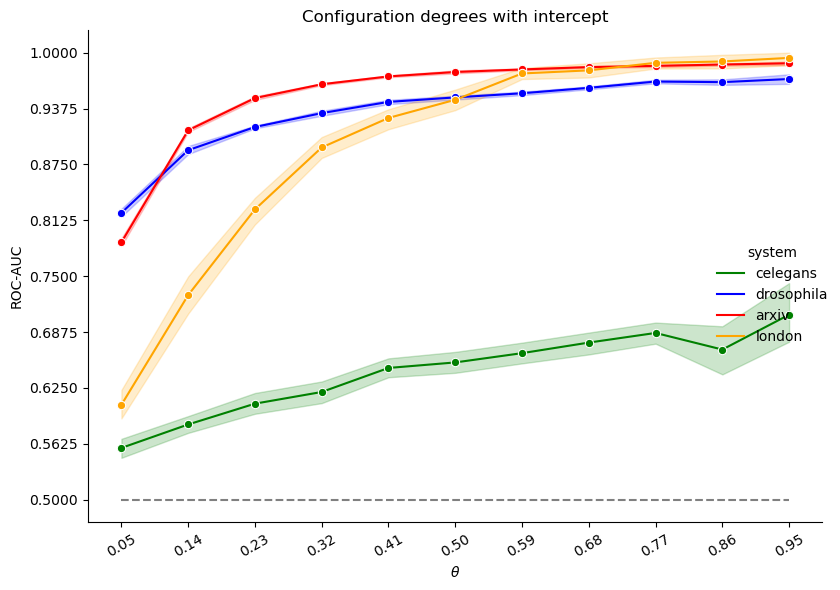

In [10]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'imb', 'deg'}") | (df.features == "{'deg', 'imb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration degrees with intercept")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_imb-deg_{TAG}.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

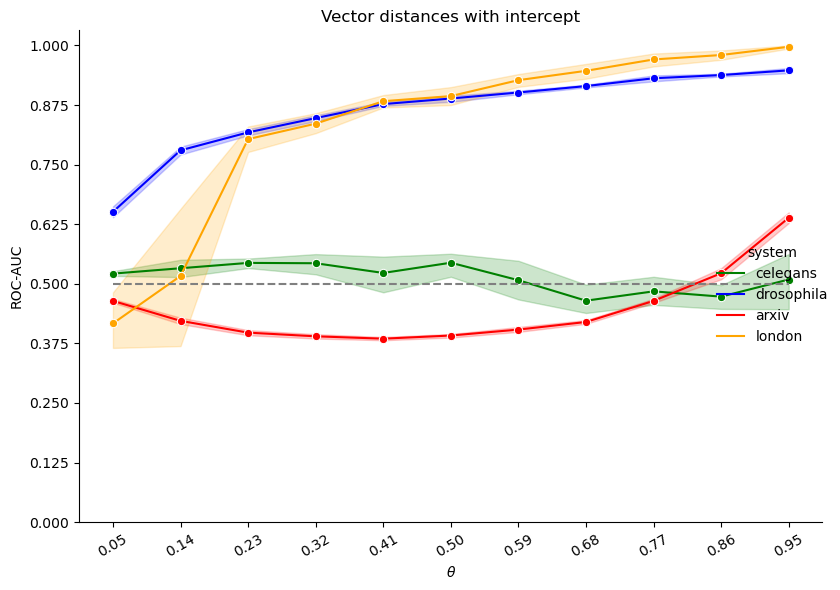

In [11]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'imb'}") | (df.features == "{'imb', 'emb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Vector distances with intercept")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb_{TAG}.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

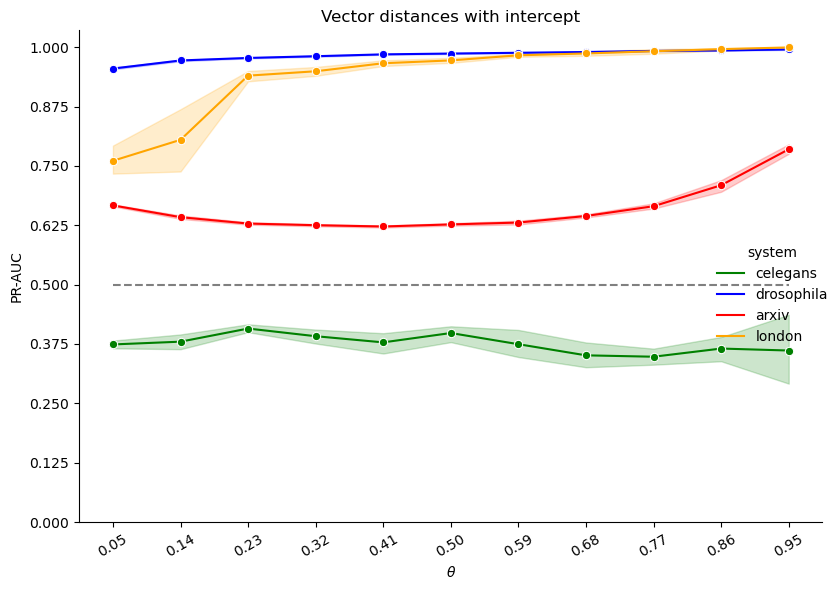

In [12]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'imb'}") | (df.features == "{'imb', 'emb'}")], kind="line",
    x="theta", y="aupr",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("PR-AUC")


# Figure-level attributes
plt.title("Vector distances with intercept")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_aupr-pfi_imb-emb_{TAG}.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

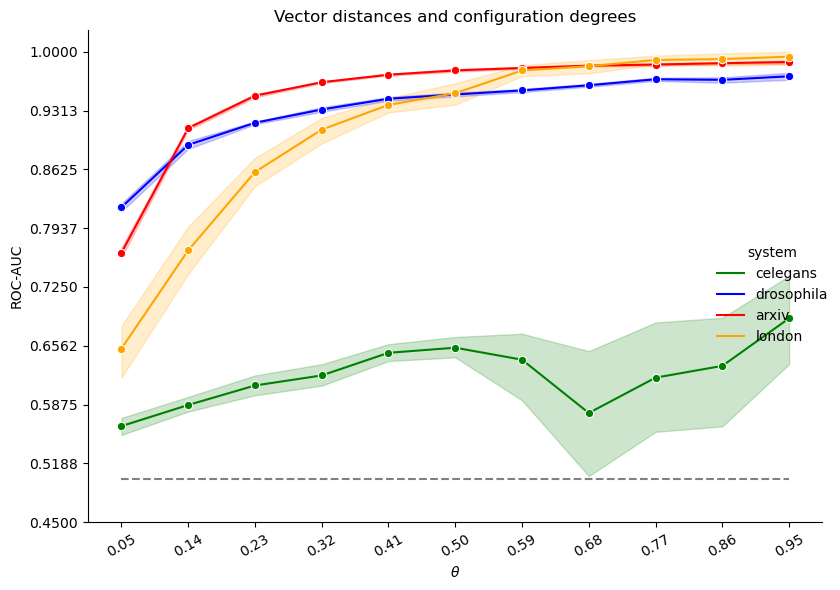

In [13]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'deg'}") | (df.features == "{'deg', 'emb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.45, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Vector distances and configuration degrees")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_emb-deg_{TAG}.png", facecolor="white", transparent=False)

### All features

<Figure size 640x480 with 0 Axes>

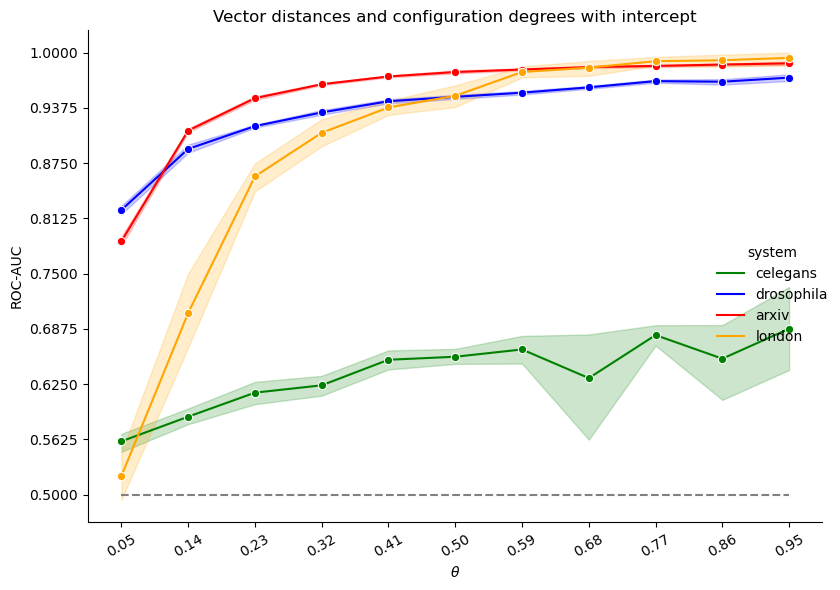

In [14]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'deg', 'imb'}") | (df.features == "{'imb', 'emb', 'deg'}") | (df.features == "{'imb', 'deg', 'emb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Vector distances and configuration degrees with intercept")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-deg_{TAG}.png", facecolor="white", transparent=False)